# QS2 Rotation-Vibration Spectrum of CO

## Importing data
Download your data from Moodle and import it as well as the necessary libraries:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sg
import scipy.optimize as opt 
import numpy as np

%matplotlib inline
plt.style.use('seaborn-whitegrid')

# Import data
data = pd.read_csv('CO.CSV')

Check your data has imported correctly:

In [9]:
data

,wav,int
0,399.9761,1.885617
1,400.0363,1.849771
2,400.0966,1.807714
3,400.1569,1.764329
4,400.2171,1.725723
...,...,...
59733,3999.7610,0.064732
59734,3999.8210,0.064738
59735,3999.8810,0.064728
59736,3999.9420,0.064703


Plot the experimental spectrum. Concentrate on the structure in the 2150 cm$^{-1}$ region of the spectrum (zoom in using `xmin` and `xmax`). 

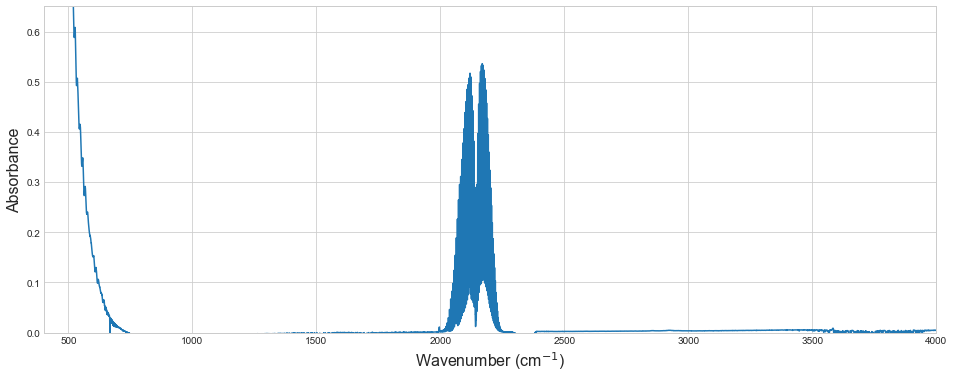

In [13]:
# Plot data
x = data['wav']
y = data['int'] - 0.06

xmin = 4000 # UPDATE
xmax = 400  # UPDATE

fig = plt.figure(figsize=(16,6))
plt.plot(x,y)

plt.xlabel('Wavenumber (cm$^{-1}$)', size=16)
plt.ylabel('Absorbance',size=16)
#plt.title("TITLE", size=16)
plt.xlim(xmax,xmin)
plt.ylim(0,0.65)
plt.show()

## Pick the Peaks

Use the code below to pick the peak positions by adjusting the `prominence` and `distance` parameters within the [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) function. Make sure that as many peaks have been picked as possible. Extra peaks or false peaks do not matter at this stage.

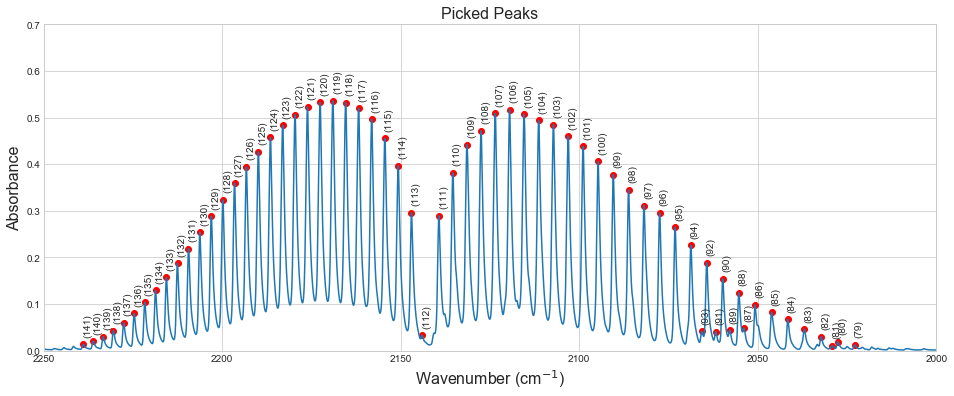

In [14]:
peaks = sg.find_peaks(y,prominence=.005, distance=None, height=0.01) # Adjust the parameters

fig = plt.figure(figsize=(16,6))
plt.plot(x[peaks[0]],y[peaks[0]],"ro")
plt.plot(x,y)

xmin = 2000
xmax = 2250
ymin = 0.0
ymax = 0.7

plt.xlim(xmax,xmin)
plt.ylim(ymin,ymax)

# Labelling the picked peaks
for i in range(len(peaks[0])):
    if x[peaks[0][i]] > xmin and x[peaks[0][i]] < xmax:
        stri = '({})'.format(i)
        plt.text(x[peaks[0][i]],y[peaks[0][i]]+0.02,stri,rotation=90)

plt.xlabel('Wavenumber (cm$^{-1}$)', size=16)
plt.ylabel('Absorbance',size=16)
plt.title("Picked Peaks", size=16)
plt.show()

### Assign R branch
To aid your analysis, the first line in the R-branch should be located near 2147 cm$^{-1}$. 

In [15]:
R = list(range(113,142))

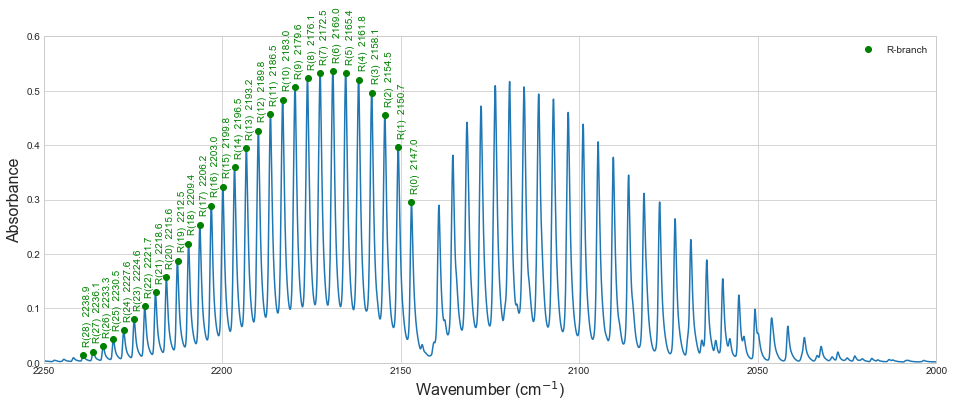

In [16]:
fig= plt.figure(figsize=(16,6))
plt.plot(x,y)

xmin = 2000
xmax = 2250
ymin = 0.0
ymax= 0.6

plt.xlim(xmax,xmin)
plt.ylim(ymin,ymax)

######### Choose the indices of the peaks associated with the R-branch (R(0) is at 2147cm-1)
#R = []     # Complete the list of indices AND label from the middle outwards
offsetR = 0        # Update the offset to assign the upper quantum number
#########

### Empty arrays in which to store the assigned wavenumber and quantum number
R_x = np.array([],dtype=np.float64)
R_y = np.array([],dtype=np.float64)
JR = np.array([],dtype=np.int64)

### Assigning and labelling peaks
for i in range(len(R)):
    R_x = np.append(R_x,x[peaks[0][R[i]]])
    R_y = np.append(R_y,y[peaks[0][R[i]]])
    JR = np.append(JR,i + offsetR) 
    stri = 'R({})  {:.5}'.format(JR[i],R_x[i])
    plt.text(R_x[i],R_y[i]+.02,stri,rotation=90,color='g')
    
### Plot
plt.plot(R_x,R_y,'go',label= 'R-branch')
plt.xlabel('Wavenumber (cm$^{-1}$)', size=16)
plt.ylabel('Absorbance',size=16)
plt.legend()
plt.show()

### Assign P branch

In [17]:
# Python to make list of numbers in a range, remove certain ones then reverse the order
P = list(range(82,112))
P.remove(87)
P.remove(89)
P.remove(91)
P.remove(93)
P.reverse()
print(P)

[111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 92, 90, 88, 86, 85, 84, 83, 82]


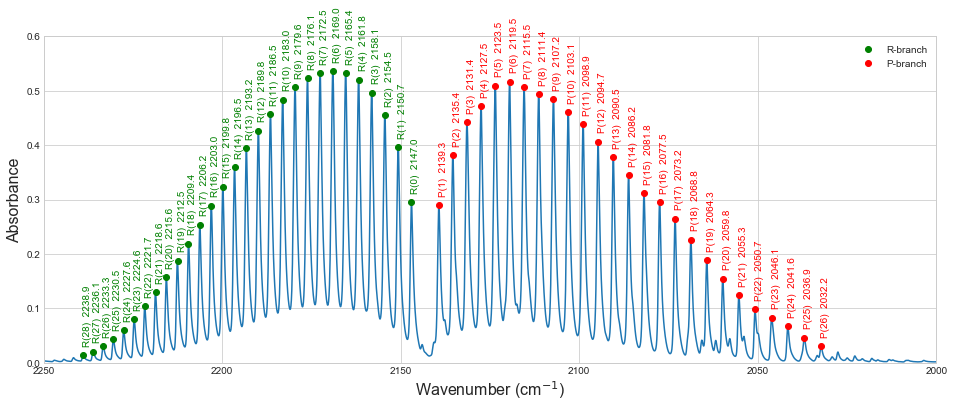

In [18]:
fig= plt.figure(figsize=(16,6))
plt.plot(x,y)

xmin = 2000
xmax = 2250
ymin = 0.0
ymax= 0.6
plt.xlim(xmax,xmin)
plt.ylim(ymin,ymax)

######### Choose the indices of the peaks associated with the main progression associated with v"=0
P = [111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 92, 90, 88, 86, 85, 84, 83, 82]     # Complete the list of indices AND label from the middle outwards
offsetP = 1 # Update the offset to assign the upper quantum number
#########

P_x = np.array([],dtype=np.float64)
P_y = np.array([],dtype=np.float64)
JP = np.array([],dtype=np.int64)

for i in range(len(P)):
    P_x = np.append(P_x,x[peaks[0][P[i]]])
    P_y = np.append(P_y,y[peaks[0][P[i]]])
    JP = np.append(JP,i + offsetP) 
    stri = 'P({})  {:.5}'.format(JP[i],P_x[i])
    plt.text(P_x[i],P_y[i]+0.02,stri,rotation=90,color='r')

for i in range(len(R)):
    stri = 'R({})  {:.5}'.format(JR[i],R_x[i])
    plt.text(R_x[i],R_y[i]+0.02,stri,rotation=90,color='g')


plt.plot(R_x,R_y,'go',label= 'R-branch')
plt.plot(P_x,P_y,'ro',label= 'P-branch')
plt.xlabel('Wavenumber (cm$^{-1}$)', size=16)
plt.ylabel('Absorbance',size=16)
plt.legend()
plt.show()

Store the picked wavenumbers (cm$^{-1}$) in the array `energy`. Create a new quantum number $m$, which will allow both sets of data to be plotted together on the same curve. Is it smooth?

In [26]:
### Empty arrays
energy = np.array([],dtype=np.float64)
m = np.array([],dtype=np.int64)

### Assigning quantum number m to plot together on same curve
for i in range(len(JR)):
    m = np.append(m,JR[i]+1) # start J from 1, since arrays start counting at 0
    energy = np.append(energy,R_x[i])

for i in range(len(JP)):
    m = np.append(m,-JP[i]) # P quantum numbers increase with a decrease in energy
    energy = np.append(energy,P_x[i])   
    
print(m)
print(energy)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  -1  -2  -3  -4  -5  -6  -7
  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17 -18 -19 -20 -21 -22 -23 -24 -25
 -26]
[2146.986 2150.723 2154.459 2158.135 2161.812 2165.427 2168.983 2172.539
 2176.094 2179.589 2183.024 2186.459 2189.834 2193.209 2196.524 2199.778
 2203.032 2206.227 2209.42  2212.494 2215.628 2218.641 2221.654 2224.607
 2227.56  2230.453 2233.285 2236.118 2238.89  2139.272 2135.416 2131.438
 2127.521 2123.543 2119.506 2115.468 2111.37  2107.212 2103.114 2098.895
 2094.677 2090.458 2086.179 2081.84  2077.501 2073.162 2068.763 2064.303
 2059.844 2055.324 2050.744 2046.103 2041.583 2036.943 2032.243]


Note: The branch positions have switched, so P is bottom left and R is top right (in line with increasing energy).

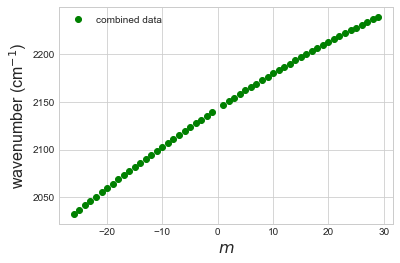

In [19]:
plt.plot(m,energy,'go',label='combined data')
plt.xlabel('$m$',size=16)
plt.ylabel('wavenumber (cm$^{-1}$)',size=16)
plt.legend()
plt.show()

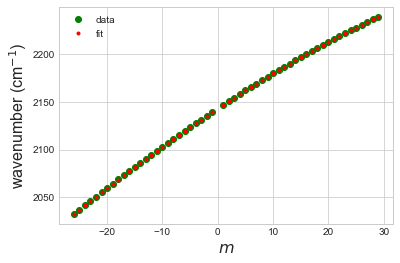

-0.017370110302125985 3.826912055642603 2143.0981087314667
B1 =  1.9047709726702386  cm-1
B0 =  1.9221410829723644  cm-1
Be =  1.9308261381234273  cm-1
w =  2143.0981087314667  cm-1


In [20]:
##fit a quadratic
def func(x,a,b,c,d):
    return a*x**2 + b*x + c + d*x**3

optP, pcov = opt.curve_fit(func,m, energy)

plt.plot(m,energy,'go',label='data')
plt.plot(m,func(m,*optP),'r.',label='fit')

plt.xlabel('$m$',size=16)
plt.ylabel('wavenumber (cm$^{-1}$)',size=16)
plt.legend()
plt.show()

print(optP[0],optP[1],optP[2])

B0 = (optP[1]-optP[0])/2
B1 = (optP[1]+optP[0])/2
w = optP[2]

Be = B0 - 0.5*(B1-B0)

print('B1 = ',B1,' cm-1')
print('B0 = ',B0,' cm-1')
print('Be = ',Be,' cm-1')
print('w = ',w,' cm-1')

Literature is $B_e = 1.93128087$ cm$^{-1}$ - estimate errors in the your numberinos, if out... try adding a cubic term to the fit! This will account for higher order terms not present in the rigid rotor model, such as centrifugal distortion.

In [104]:
err_a = 2*pcov[0][0]**0.5
err_b = 2*pcov[1][1]**0.5

err_B0 = (err_a**2+err_b**2)**0.5

err_Be = (err_B0**2+(0.5*err_a)**2)**0.5

print('Be = ',Be,'+/-',err_Be,' cm-1')

Be =  1.9308261381234273 +/- 0.0012047342951949452  cm-1


In [105]:
optP[3]

-2.3283127434270412e-05

In [106]:
4*4*Be/w**2

6.72634356047663e-06